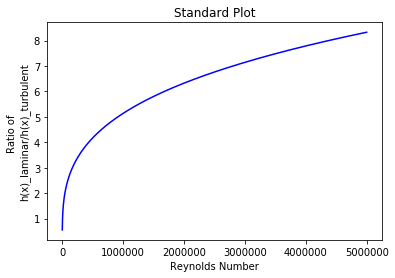

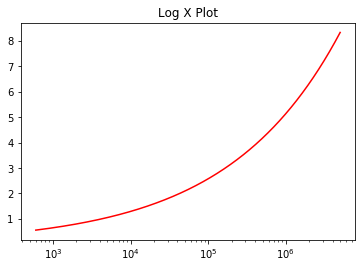

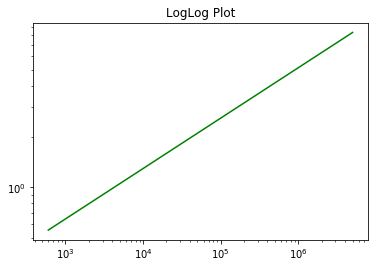

In [22]:
# Q1
import numpy as np
import matplotlib.pyplot as plt

T_wall = 300 #[K]
T_inf = 300 #[K]
nu_air = 1.578e-5 #[m^2/s] at 300K
k_fluid = 0.02623 #[W/mK] for air at 300K
alpha_air = 2.213e-5 #[m^2/s] for air at 300K

Pr = nu_air/alpha_air # gives same value as in back of text for Pr
T_film = 1/2*T_wall+T_inf #film average temp from fixed wall temp
Re = np.arange(600,5e6,50) # range starting at 600

h_ratio =[]
N = len(Re)
i = 0

while i < N:
    # calculating Nu numbers for each range
    # laminar (assuming Re*Pr > 100)
    #Nu_lam = (0.3387*(Re[i])**(1/2)*Pr**(1/3))/((1+(0.0468/Pr)**(2/3))**(1/4)) # ie this holds for Re > 140
    Nu_lam=0.332*Re[i]**(1/2)*Pr**(1/3)
    
    hx_lam = Nu_lam
    hx_turb = 0.0296*(Re[i])**0.8*Pr**0.6
    
    h_ratio.append(hx_turb/hx_lam)
    i += 1
    
plt.plot(Re,h_ratio,'b-')
plt.xlabel('Reynolds Number')
plt.ylabel('Ratio of \nh(x)_laminar/h(x)_turbulent')
plt.title('Standard Plot')
plt.show()

plt.plot(Re,h_ratio,'r-')
plt.xscale('log')
plt.title('Log X Plot')
plt.show()

plt.loglog(Re,h_ratio,'g-')
plt.title('LogLog Plot')
plt.show()


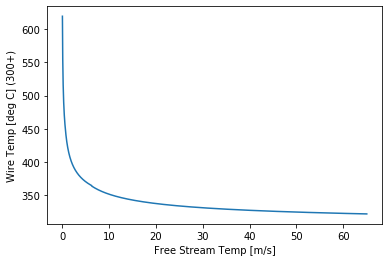

In [21]:
# Q2
T_inf = 300 #[K]
nu_air = 1.578e-5 #[m^2/s] at 300K
k_fluid = 0.02623 #[W/mK] for air at 300K
alpha_air = 2.213e-5 #[m^2/s] for air at 300K
H_wire = 0.1e-3 #[m]
Q_perL = 17.8 #[W/m]

u_inf = np.arange(.07,65,0.01) #plot starting from .07 since ReH is not in range below this value
Pr = nu_air/alpha_air # gives same value as in back of text for Pr

i = 0
N = len(u_inf)
T_surf = []

while i < N:
    ReH = u_inf[i]*H_wire/nu_air

    if (0.4<=ReH<=4):
        C = 0.989
        m = 0.330
    elif (4<ReH<=40):
        C = 0.911
        m = 0.385
    elif (40<ReH<=4000):
        C = 0.683
        m = 0.466
    else:
        print('not in range')

    Nu = C*ReH**m*Pr**(1/3)
    h = Nu*k_fluid/H_wire
    q_w2f = Q_perL/np.pi*H_wire

    T_surf.append(17.8/Nu/k_fluid/np.pi+T_inf)
    i += 1

plt.plot(u_inf,T_surf)
plt.xlabel('Free Stream Temp [m/s]')
plt.ylabel('Wire Temp [deg C]')
plt.show()


In [61]:
# Q3
from numpy import interp
import math as m

# constants 
u_bulk = 5 #[m/s]
T_bulk = 95 #[degC]
di = 0.01 #[m]
do = 0.014 #[m]
L = 100
T_inf = 25 #[degC]
T_tube = 60 #[degC]
rho_water = 998

# interpolation data
nu  = [5.832e-7, 4.308e-7, 3.371e-7, 2.940e-7]
Pr = [3.77, 2.68, 2.03, 1.75]
k = [0.6396, 0.6605, 0.6737, 0.6791]
c = [4181, 4189, 4202, 4216]
TempC = [47, 67, 87, 100] 

Interp_Temp = 60

nu1 = interp(Interp_Temp,TempC,nu)
k1 = interp(Interp_Temp,TempC,k)
Pr1 = interp(Interp_Temp,TempC,Pr)
c1 = interp(Interp_Temp,TempC,c)

Re = u_bulk*di/nu1
f = (1.82*m.log10(Re)-1.64)**-2
NuD = (f/8)*(Re-1000)*Pr1/(1+12.7*m.sqrt(f/8)*(Pr1**(2/3)-1))

h = NuD*k1/di

Tout = (1-m.exp(-h*m.pi*di*L/5/m.pi/(di/2)**2/rho_water/c1))*(T_tube - T_bulk)+T_bulk
print(Tout)

60.0
